In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

import matplotlib.patches as patches
import mpl_toolkits.mplot3d.art3d as art3d
from numpy import pi, arange, linspace, sin

#os.chdir('C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/Dataset')
#os.chdir('C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/data/data')

In [3]:
# This cell merges all years' dataset to make a single combined dataset file.
# But as of today(02/14/2020), I will not used this source code.
# From now on, I will use dataset provided by Chieh Hsu

#extension = 'csv'
#allFileNames = [i for i in glob.glob('*.{}' .format(extension))]

#combined_dataset = pd.concat([pd.read_csv(f) for f in allFileNames])
#combined_dataset.to_csv( "combined_dataset.csv", index=False, encoding='utf-8-sig')

In [4]:
#fireDataFrame = pd.read_csv('C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/Dataset/fd_incidents_2019_datasd_v1.csv')
#fireDataFrame = pd.read_csv('C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/data/data/all_fd_incidents.csv')

import dataloader
years = range(2007,2020)
fireDataFrame = dataloader.load(years)

fireDataFrame_2019 = pd.read_csv('C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/data/data/fd_incidents_2019_datasd_v1.csv')

In [6]:
pwd

'C:\\1-HYK\\UCSD-Course\\05-WINTER20-ECE143\\ECE143_Project'

## Since pivot table is very powerful tool, we create pivot table of dataset using pandas.
#### Using this pivot table we can carry out any fundamental analysis.
#### Because the below stand-alone pivot table is too burden, we also creat pivot table for queation #1~#4

In [7]:
# To create interactive pivot table, you need to install pivottablejs
from pivottablejs import pivot_ui

# The below code makes a stand-alone pivot talbe.
# If your jupyter notebook configuratino is well adjusted, you can also make a pivot table acting in jupyter notebook cell.
#pivot_ui(fireDataFrame, outfile_path = 'C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/data/data/FireIncidentPivot.html')
pivot_ui(fireDataFrame_2019, outfile_path = 'C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/data/data/FireIncidentPivot_2019.html')

## Question 1: What is the year-to-year trend of these incidents? Does more incidents occur?

In [9]:
yearPivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['year_response'], columns=[], aggfunc=numpy.ma.count, fill_value=0)
yearPivotTable

,incident_number
year_response,
2007,102797
2008,105596
2009,107729
2010,111946
2011,118143
2012,124188
2013,126430
2014,133197
2015,144381


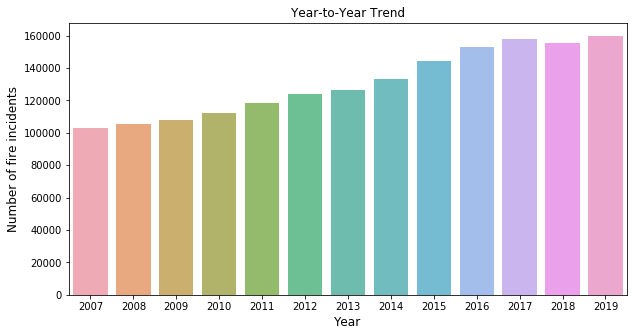

Text(2008,100000,'Increase')

In [10]:
year_count  = fireDataFrame['year_response'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(year_count.index, year_count.values, alpha=0.8)
plt.title('Year-to-Year Trend')
plt.ylabel('Number of fire incidents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

ax.annotate('Increase',
            xy=(2019,110000), # where to put arrow endpoint
            xytext=(2008,100000), # text position in data coordinates
            textcoords='axes fraction',
            arrowprops={'facecolor':'blue',
                        'shrink':0.05,
                        'width':10,
                        'headwidth':20,
                        'headlength':6},
            fontsize=18,
            )

## Question 2: What month of the year does fire tend to occur? What time of the day does fire tend to occur? Are there any correlations we can explore?

In [11]:
monthPivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['month_response'], columns=[], aggfunc=numpy.ma.count, fill_value=0)
monthPivotTable

,incident_number
month_response,
1,142484
2,130242
3,143848
4,136637
5,140617
6,139216
7,147728
8,147757
9,144236


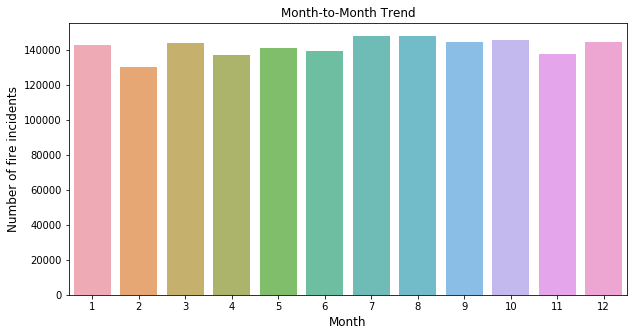

In [12]:
month_count  = fireDataFrame['month_response'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(month_count.index, month_count.values, alpha=0.8)
plt.title('Month-to-Month Trend')
plt.ylabel('Number of fire incidents', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

In [13]:
yearMonthPivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['year_response'], columns=['month_response'], aggfunc=numpy.ma.count, fill_value=0)
yearMonthPivotTable

month_response,1,2,3,4,5,6,7,8,9,10,11,12
year_response,,,,,,,,,,,,
2007,8425,7949,8640,8054,8515,8586,8787,8937,8517,9266,8351,8770
2008,9162,8316,8997,8583,8560,8896,9027,9215,8649,8846,8481,8864
2009,8715,8349,9125,9141,9048,8654,9526,9163,9042,9118,8708,9140
2010,9304,8265,9327,9022,9398,9163,9600,9473,9269,9743,9410,9972
2011,9814,9066,9944,9385,9637,9461,10344,10270,10258,10184,9629,10151
2012,10271,9475,10523,9809,9921,10161,10701,11146,10728,10619,10203,10631
2013,11316,9923,10576,9864,10676,10536,10832,11028,10830,10406,10029,10414
2014,10960,9619,10809,10627,11517,10829,11631,11812,11756,11407,10945,11285
2015,11936,10727,12313,11396,11902,11719,12519,12693,12658,12490,11641,12387


## Question 3: Where does fires tend to occur? We can answer this from visualization of incidents on the map of San Diego city.
### => According to pivot table, there are a lot of fires in the area with zipcode 92101 which is downtown.

In [14]:
zipPivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['address_zip'], columns=[], aggfunc=numpy.ma.count, fill_value=0)
zipPivotTable

,incident_number
address_zip,
91911,176
91914,1
91932,223
91942,340
91945,127
91950,274
92014,7156
92025,514
92027,1244


Text(17,230000,'max at 92101')

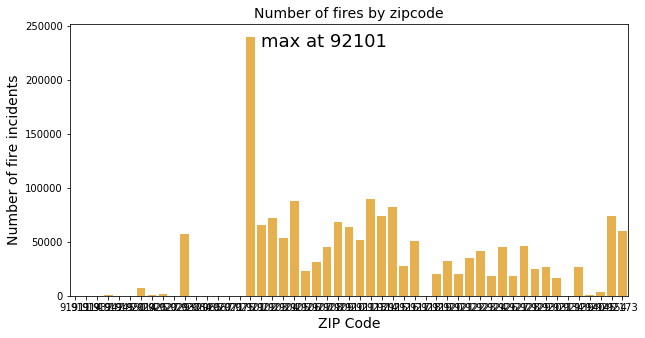

In [15]:
zip_count  = fireDataFrame['address_zip'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(zip_count.index, zip_count.values, alpha=0.8, color='orange')
plt.title('Number of fires by zipcode', fontsize=14)
plt.ylabel('Number of fire incidents', fontsize=14)
plt.xlabel('ZIP Code', fontsize=14)

ax.text(17,230000,'max at 92101',fontsize=18)

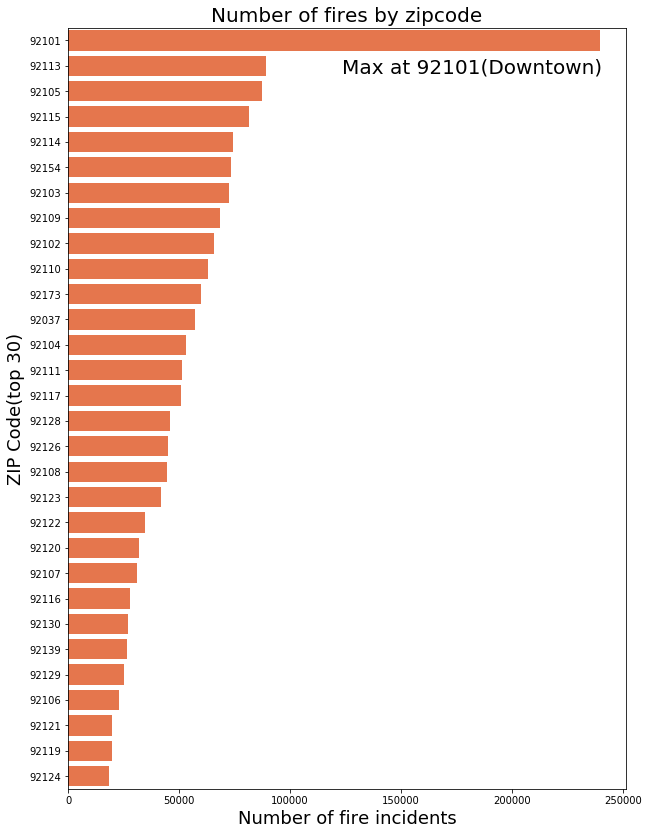

In [43]:
zip_count  = fireDataFrame['address_zip'].value_counts()
zip_count = zip_count[0:30]
plt.figure(figsize=(10,14))
ax = sns.barplot(y = zip_count.index, x= zip_count.values, alpha=0.8, color = 'orangered',orient = 'h', order=zip_count.index)
plt.title('Number of fires by zipcode', fontsize=20)
plt.ylabel('ZIP Code(top 30)', fontsize=18)
plt.xlabel('Number of fire incidents', fontsize=18)
ax.text(123600,1.3,'Max at 92101(Downtown)',fontsize=20)
plt.savefig('pic_zip-num.png')

In [37]:
zip_count = zip_count[0:30]
zip_count

92101    239444
92113     89184
92105     87535
92115     81731
92114     74150
92154     73485
92103     72353
92109     68595
92102     65660
92110     63243
92173     60017
92037     57093
92104     53050
92111     51507
92117     50811
92128     45914
92126     44848
92108     44761
92123     41818
92122     34727
92120     32045
92107     31080
92116     27835
92130     27075
92139     26489
92129     25053
92106     22848
92121     19967
92119     19771
92124     18336
Name: address_zip, dtype: int64

## Question 4:	Is there a certain correlation between time and location? For each small district, we can check if more fires break out in a particular month or season.

In [11]:
monthZipPivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['month_response'], columns=['address_zip'], aggfunc=numpy.ma.count, fill_value=0)
monthZipPivotTable

address_zip,91911,91914,91932,91942,91945,91950,92014,92025,92027,92029,...,92128,92129,92130,92131,92134,92139,92140,92145,92154,92173
month_response,,,,,,,,,,,,,,,,,,,,,
1,18,0,24,27,13,23,619,38,92,3,...,4274,2383,2463,1528,4,2524,93,319,6692,5430
2,14,0,19,22,5,20,537,34,81,1,...,3647,1924,2102,1278,3,2073,68,268,5725,4489
3,11,1,18,28,8,24,607,36,122,2,...,3945,2061,2263,1349,7,2346,84,335,6153,5023
4,11,0,15,38,12,22,631,48,117,3,...,3714,1972,2119,1294,5,2171,86,271,6013,4759
5,15,0,16,23,8,27,564,37,99,2,...,3786,2086,2186,1393,2,2160,74,315,6307,5032
6,8,0,24,33,16,23,622,34,109,3,...,3648,2053,2191,1352,5,2183,95,312,5998,4860
7,13,0,16,29,8,18,694,49,139,3,...,3699,2059,2297,1362,2,2206,92,304,6097,5206
8,12,0,20,32,7,28,628,51,137,4,...,3751,2182,2263,1407,1,2225,88,295,6380,5397
9,17,0,18,33,15,21,541,38,90,0,...,3839,2033,2267,1329,7,2120,89,276,6010,5146


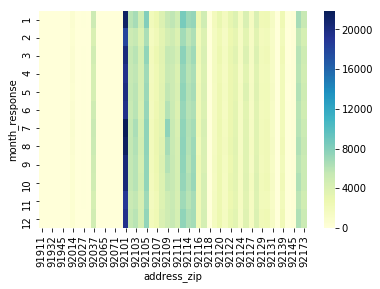

In [26]:
ax = sns.heatmap(monthZipPivotTable, cmap='YlGnBu')

In [27]:
#fireDataFrame.plot(x='address_zip', y='month_response', kind='scatter')

In [28]:
#fireDataFrame.plot.scatter(x='address_zip', y='month_response', c='DarkBlue')#, colormap='viridis')

In [36]:
'''
f = plt.figure(figsize=(20, 20))
plt.matshow(fireDataFrame.corr(), fignum=f.number)
plt.xticks(range(fireDataFrame.shape[1]), fireDataFrame.columns, fontsize=14, rotation=45)
plt.yticks(range(fireDataFrame.shape[1]), fireDataFrame.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
'''

"\nf = plt.figure(figsize=(20, 20))\nplt.matshow(fireDataFrame.corr(), fignum=f.number)\nplt.xticks(range(fireDataFrame.shape[1]), fireDataFrame.columns, fontsize=14, rotation=45)\nplt.yticks(range(fireDataFrame.shape[1]), fireDataFrame.columns, fontsize=14)\ncb = plt.colorbar()\ncb.ax.tick_params(labelsize=14)\nplt.title('Correlation Matrix', fontsize=16);\n"

In [37]:
'''
corr = fireDataFrame.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
'''

'\ncorr = fireDataFrame.corr()\nsns.heatmap(corr, \n        xticklabels=corr.columns,\n        yticklabels=corr.columns)\n'

## Qeustion 5:	How can the city improve response time? Does the city need more fire stations/health care? We can try to find the distance between events and fire stations/health care:
### a.	Find the shortest distance between a zip code and the nearest fire station.
### b.	Calculate average of shortest distances for all zip codes.